### Análise de Regressão Linear Multivariada
#### Período de análise: Janeiro de 2015 até Março de 2021.
##### Autor: Saulo Brendo Alves de Jesus 
##### LinkedIn: linkedin.com/in/saulo-brendo/

### Importação de Pacotes 

In [1]:
import pandas as pd     
import numpy as np      
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
import statsmodels.api as sm

### Obtenção de Dados

In [2]:
# Definir os tickers dos ativos
tickers = ["^BVSP", "VALE3.SA", "PETR4.SA", "SANB11.SA"]

# Definindo período
init_data = '1/1/2015'
end_data = "31/03/2021"

# Solicitação de dados através da API
tickers_data = data.DataReader(tickers,'yahoo',init_data,end_data)['Adj Close']
tickers_data.head()

Symbols,PETR4.SA,SANB11.SA,VALE3.SA,^BVSP
Date,,,,
2015-01-02,8.683292,8.976747,16.528288,48512.0
2015-01-05,7.941133,8.913231,16.279737,47517.0
2015-01-06,7.681376,8.976747,16.932171,48001.0
2015-01-07,8.043180,9.350778,17.553537,49463.0
2015-01-08,8.562694,9.195519,17.739946,49943.0


### Calculo de Retornos

In [3]:
# Obter valor dos retornos logarítimicos diários
retornos = np.log(tickers_data).diff().dropna()

# Visualização dos 5 primeiros valores
retornos.head()

Symbols,PETR4.SA,SANB11.SA,VALE3.SA,^BVSP
Date,,,,
2015-01-05,-0.089345,-0.007101,-0.015152,-0.020724
2015-01-06,-0.033257,0.007101,0.039294,0.010134
2015-01-07,0.046026,0.040822,0.036040,0.030003
2015-01-08,0.062590,-0.016743,0.010563,0.009657
2015-01-09,0.029885,-0.010027,-0.021687,-0.022333


Text(0.5, 1.0, 'Retornos dos Ativos')

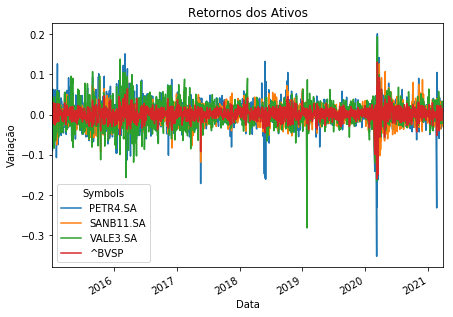

In [4]:
# Visualização dos Retornos
retornos.plot(figsize = (7,5))
plt.xlabel('Data')
plt.ylabel('Variação')
plt.title("Retornos dos Ativos")

### Análise Exploratória

In [13]:
# Informações sobre as variáveis
retornos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1534 entries, 2015-01-05 to 2021-03-31
Data columns (total 4 columns):
PETR4.SA     1534 non-null float64
SANB11.SA    1534 non-null float64
VALE3.SA     1534 non-null float64
^BVSP        1534 non-null float64
dtypes: float64(4)
memory usage: 59.9 KB


In [16]:
# Estatística descritiva dos retornos
retornos.describe()

Symbols,PETR4.SA,SANB11.SA,VALE3.SA,^BVSP
count,1534.000000,1534.000000,1534.000000,1534.000000
mean,0.000691,0.000955,0.001124,0.000560
std,0.034628,0.024393,0.031498,0.017295
min,-0.352367,-0.144726,-0.281822,-0.159930
25%,-0.015806,-0.012586,-0.014951,-0.007823
50%,0.001299,0.000448,0.000529,0.000839
75%,0.017580,0.015277,0.016669,0.009826
max,0.200671,0.125841,0.193574,0.130223


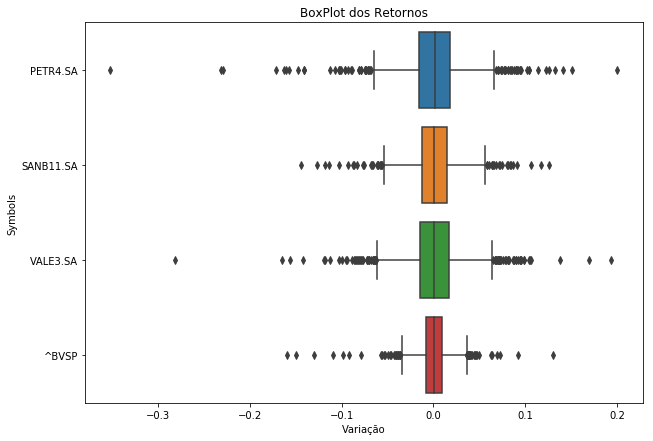

In [17]:
# BoxPlot dos Retornos
ax = sns.boxplot(data = retornos, orient = "h")
ax.figure.set_size_inches(10,7)
ax.set_title("BoxPlot dos Retornos")
ax.set_xlabel("Variação")
ax

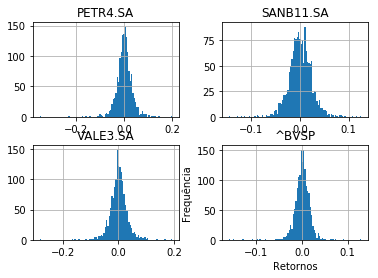

In [8]:
# Histograma dos retornos
retornos.hist(bins = 100)
plt.xlabel('Retornos')
plt.ylabel('Frequência')
plt.show()

### Correlação entre variáveis

In [9]:
# Calcular a correlação entre os ativos
corr = retornos.corr()
corr

Symbols,PETR4.SA,SANB11.SA,VALE3.SA,^BVSP
Symbols,,,,
PETR4.SA,1.000000,0.560384,0.491207,0.793956
SANB11.SA,0.560384,1.000000,0.399732,0.769209
VALE3.SA,0.491207,0.399732,1.000000,0.601105
^BVSP,0.793956,0.769209,0.601105,1.000000


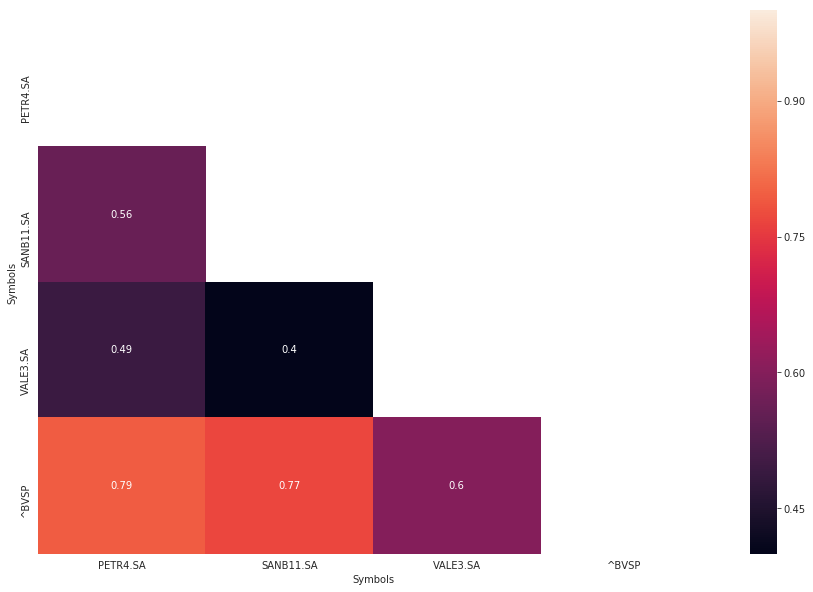

In [10]:
# Criar mascara para visualizar apenas uma das partes
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plotar gráfico de correlação
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr, mask=mask, annot=True)

### Regressão Linear com OLS

##### Problema: Os retornos da Petrobras, Vale e Santander explicam os retornos do Ibovespa?

In [11]:
# Variável dependente
y = retornos["^BVSP"]

# Variáveis independentes
x2 = sm.add_constant(retornos[["PETR4.SA","VALE3.SA","SANB11.SA"]])

# Modelagem
est = sm.OLS(y, x2)
est2 = est.fit()

# Resultados
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  ^BVSP   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     2249.
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:59:10   Log-Likelihood:                 5342.8
No. Observations:                1534   AIC:                        -1.068e+04
Df Residuals:                    1530   BIC:                        -1.066e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.751e-05      0.000     -0.092      0.9

/home/lbs/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [12]:
print(est2.params)

const       -0.000018
PETR4.SA     0.223982
VALE3.SA     0.113576
SANB11.SA    0.308574
dtype: float64
